# Handling Missing Data

In [5]:
import pandas as pd
import numpy as np

### If we having a missing Data then there is two option
    1.Drop missing rows or columns know as complete case analysis
    2.Impute : then there is two type
        a.univariate: SimpleImputer(): sklearn function
                -Numerical : (mean,median,random,End of distribution)
                -Categorical:(mode,missing
                  
                
        b.multivariate
                -knn imputer
                -iterative imputer
        

#### 1.Complete Case Analysis
    -when to use when value missing randomly,less than data missing 5%  if a large number of data missing column remove the entire column like 95%
    -Advantage:
        easy to implement
        preserves variable distribution
    -Disadvatage:
        it can exclude a large fraction of the data
        when using our models in production , the model will not know how to handle missing data
        
        
        

In [6]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isnull().mean()*100  

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols = [var for var in df.columns if ((df[var].isnull().mean()*100 <5) and (df[var].isnull().mean()>0))]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9297,NaN,Full time course,Graduate,4.0,92.0
18723,0.624,no_enrollment,Graduate,3.0,8.0
1720,0.840,no_enrollment,Graduate,14.0,52.0
8517,0.897,Full time course,Graduate,2.0,18.0
4983,0.910,no_enrollment,Graduate,17.0,54.0


In [10]:
len(df[cols].dropna())/len(df)  # give the precentage of missing value

0.8968577095730244

In [11]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

### Alaws draw dist on numercal to check wether got effect our not

In [12]:
import matplotlib.pyplot as plt

(array([ 980., 1623., 1611., 1326., 1442., 1126., 1151., 1192.,  923.,
         581.,  655.,  635.,  566.,  455.,  469.,  537.,  387.,  160.,
         215.,  197.,  197.,  208.,  206.,  190.,  220.,   66.,   75.,
          90.,   72.,   73.,   79.,   73.,   88.,   45.,   17.,   25.,
          32.,   22.,   48.,   30.,   11.,   35.,   23.,   26.,   31.,
          36.,   31.,   33.,   35.,   44.]),
 array([  1. ,   7.7,  14.4,  21.1,  27.8,  34.5,  41.2,  47.9,  54.6,
         61.3,  68. ,  74.7,  81.4,  88.1,  94.8, 101.5, 108.2, 114.9,
        121.6, 128.3, 135. , 141.7, 148.4, 155.1, 161.8, 168.5, 175.2,
        181.9, 188.6, 195.3, 202. , 208.7, 215.4, 222.1, 228.8, 235.5,
        242.2, 248.9, 255.6, 262.3, 269. , 275.7, 282.4, 289.1, 295.8,
        302.5, 309.2, 315.9, 322.6, 329.3, 336. ]),
 <BarContainer object of 50 artists>)

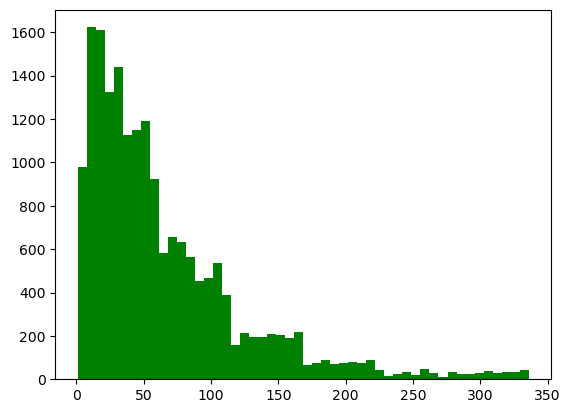

In [13]:
plt.hist(new_df['training_hours'],bins=50,color='red')
plt.hist(df['training_hours'],bins=50,color='green')

In [14]:
# As we can see from the graph that did't appear to large red color that means value got drop randomly

In [15]:
# so the point we should check the data wether it randomly or not if does not drop randomly than we should not apply cca

## SimpleImputer()

### 1.Numerical Data

  * #### Univariate imputation

#####   1.Mean
        - when data normal distribution

#####    2.Median
        - when is skewed 

- Advantage of mean/medain 
    -Simple
- Disadvantage
    - Chaning distribution shape
    - Make outliers
    - Not reliable on large missing value
    - correlation changing
- when to use:
    - missing data randomly
    - small data missing

#### implemetion mean and medain using pandas

In [16]:
df['training_hours'] = df['training_hours'].fillna(df['training_hours'].mean())
df['training_hours'] = df['training_hours'].fillna(df['training_hours'].median())

#### Note
    1.you should check  varaince  if in varaince get large change than it should not be used
    2.Distribution change also shoul be check
    3.covaraince and correlation should not be large change
    4.box plot to check outliers 

#### implemention mean and mode using 

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
imputer = SimpleImputer(strategy='mean') # you can also assign median to strategy parameter

trf1 = ColumnTransformer(transformers=[
    ('trf',SimpleImputer(strategy='mean'),['age'])
    ],remainder='passthrough')


##### 3. Arbitrary value imputataion
    - so for categorarical data replace NA with missing so machine identitfy its missing value
    - in numerical data repalce that represent any kind of data like age assign -1
    -Advatages and disadvantage
     similar to mean and mode
    -When data is not randomly missing than better to use compare to mean / medain

#### 4.End of distribution
    -End of distribution is similar to arbitrary value imputation but in this we pick the end value of distribution

### 2.Categorical Data

#### 1.Most frequent value imputation (mode)
    -simple to use
    - changing distribution shape
    - when to use
         -when missing value less than 5%
         -randomly missing data

#### 2.Create new missing value 
    - create new categorical data name missing   
    - easy to implement

### 3.Both Categorical and Numerical

#### 1.Random imputation
    - Select a Random value from data like a given column 
    - It can be used on both num and categorical
    - it easy to apply
    - does not change data distribution
    - Best for linear alogrithm
    - But the problem is it change correlation and covairance
    - its high for memory consmption

#### 2.Missing indicatior
    -Create a new column where value is missing write make it True else false
    - it works sometime
    - it can be implement using sklearn simpleimputer(indicator=True)

#### 3.Grid Search cv
    - In this sklearn calculate all combination and give you the best calculate value

## 2.Multivariate imputation

#### 1.KNN imputer
        - Knn imputer on knn alogrithm
        -it calculate distance of neighbor the near neighbor (rows) value get the value
        - euclidean distance
        -nan euclidean distance for nan value

        1.Advatage:
            -More accurate
        2.Disadvantage:
            -high calculation time taken
            -you should deploy your data on production leve for that
        

#### 2. Iterator or mice ( multivariate imputation by Chained Equations)
    -When you are sure data is missing at Random
    -slow and memory
    -deploying data on serever
    -more Accurate

## There are Type of Missing Data value

#### 1. Missing Completly at random
#### 2.Missing at Random
#### 3.Missing not at Random